In [1]:
import os
import sys

daam_path = os.path.join(os.getcwd(), "daam")
if daam_path not in sys.path:
    sys.path.append(daam_path)

In [2]:
import numpy as np
import torch
import torch.nn.functional as F
from torch import nn
from matplotlib import pyplot as plt
from diffusers import StableDiffusionPipeline
from daam import GenerationExperiment, trace, set_seed
from vis_utils import compute_cosine_similarity

%config InlineBackend.figure_format='retina'

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(device)

/home/nyuchelysheva/.conda/envs/vis/lib/python3.8/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [5]:
article_layers = [3, 6, 9, 10, 12, 14, 16] # https://arxiv.org/abs/2403.03431
layers_without_mid = [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]

In [6]:
def generate_and_plot(seed, prompt, word, heatmaps):
    gen = set_seed(seed)

    fig, ax = plt.subplots(3, 5, constrained_layout=True)
    plt.suptitle(f'prompt: "{prompt}",\n word: "{word}"', fontsize=18)
    plt.figure(figsize=(5, 10))

    for ax_ in ax.flatten():
        ax_.set_xticks([])
        ax_.set_yticks([])
        
    with torch.no_grad():
        with trace(pipe) as tc:
            out = pipe(prompt, num_inference_steps=50, generator=gen)
            for i, layer_idx in enumerate(layers_without_mid):
                ax_ = ax[i // 5, i % 5]
                heatmap = tc.compute_global_heat_map(layer_idx=i)
                heatmap = heatmap.compute_word_heat_map(word)
                heatmaps.append(heatmap)
                heatmap.plot_overlay(out.images[0], ax=ax_)
                ax_.set_title(f'Layer {layer_idx}', size=14)
                
    plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

/home/nyuchelysheva/image-editing-airi/daam/daam/utils.py:36: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast(*args, **kwargs)


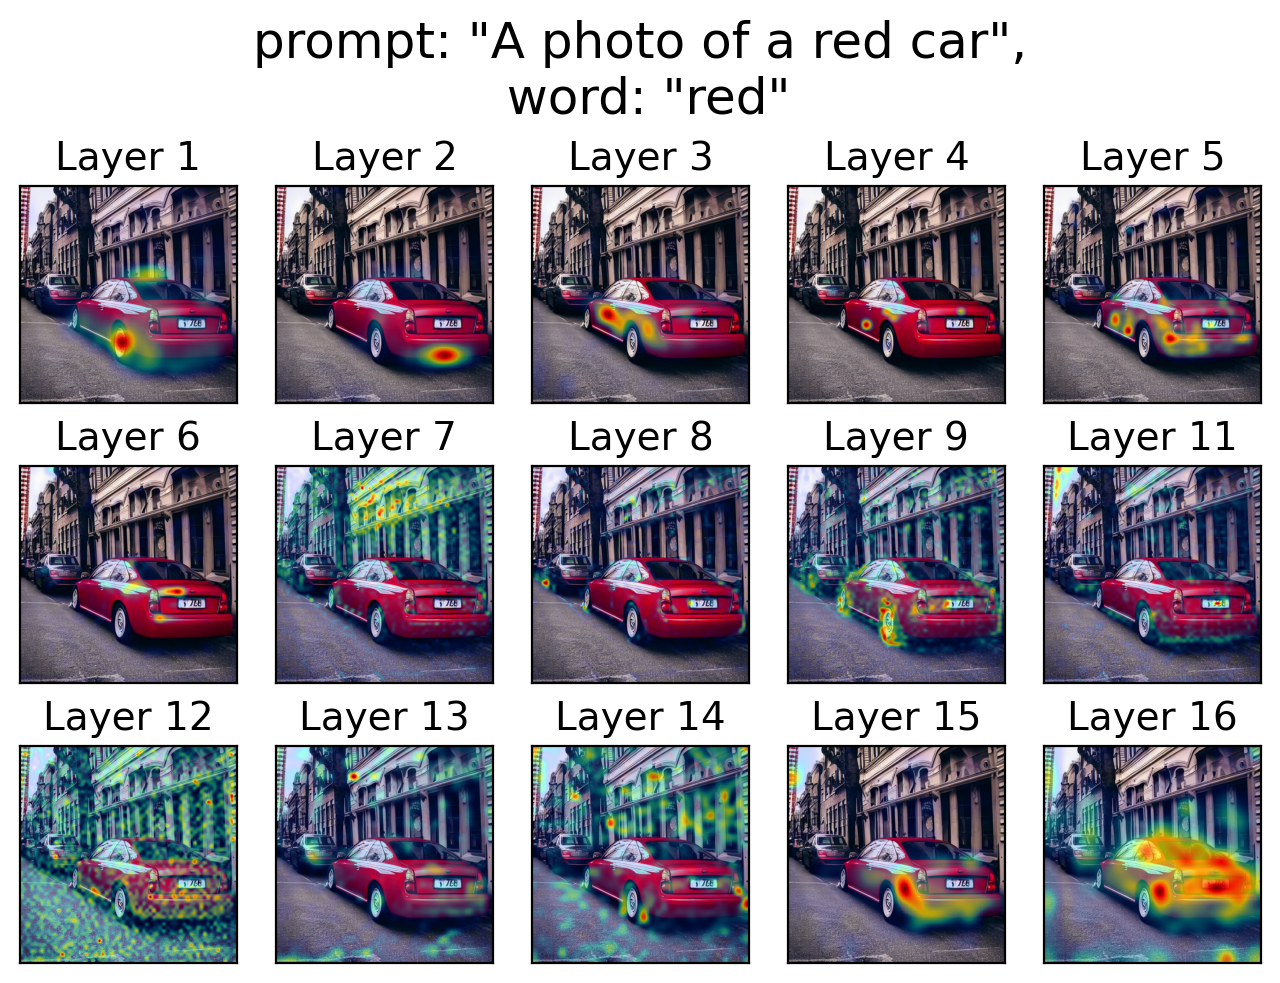

<Figure size 500x1000 with 0 Axes>

In [7]:
heatmaps_1 = []
prompt_1 = "A photo of a red car"
word_1 = "red"
seed = 228
generate_and_plot(seed, prompt_1, word_1, heatmaps_1)

  0%|          | 0/50 [00:00<?, ?it/s]

/home/nyuchelysheva/image-editing-airi/daam/daam/utils.py:36: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast(*args, **kwargs)


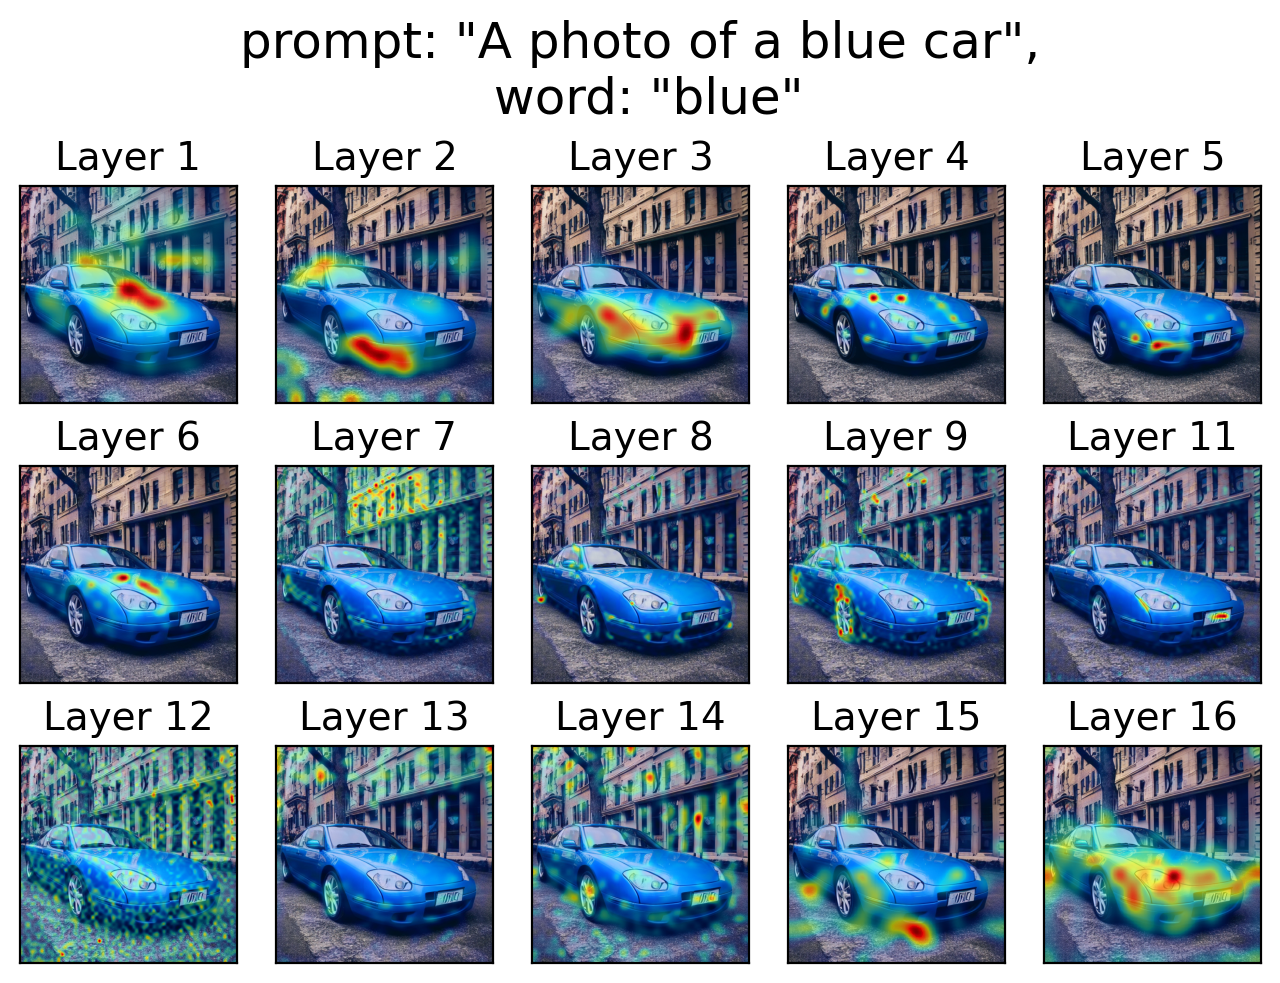

<Figure size 500x1000 with 0 Axes>

In [9]:
heatmaps_2 = []
prompt_2 = "A photo of a blue car"
word_2 = "blue"
seed = 228
generate_and_plot(seed, prompt_2, word_2, heatmaps_2)

In [11]:
heatmaps_sim = []

for heatmap_1, heatmap_2 in zip(heatmaps_1, heatmaps_2):
    cosine_similarity = compute_cosine_similarity(heatmap_1.heatmap, heatmap_2.heatmap)
    heatmaps_sim.append(cosine_similarity)

for idx, value in enumerate(heatmaps_sim):
    print(f"layer_idx={layers_without_mid[idx]}, sim={value:.2f}")

layer_idx=1, sim=0.78
layer_idx=2, sim=0.67
layer_idx=3, sim=0.83
layer_idx=4, sim=0.47
layer_idx=5, sim=0.75
layer_idx=6, sim=0.87
layer_idx=7, sim=0.97
layer_idx=8, sim=0.85
layer_idx=9, sim=0.94
layer_idx=11, sim=0.94
layer_idx=12, sim=0.99
layer_idx=13, sim=0.93
layer_idx=14, sim=0.95
layer_idx=15, sim=0.73
layer_idx=16, sim=0.94


  0%|          | 0/50 [00:00<?, ?it/s]

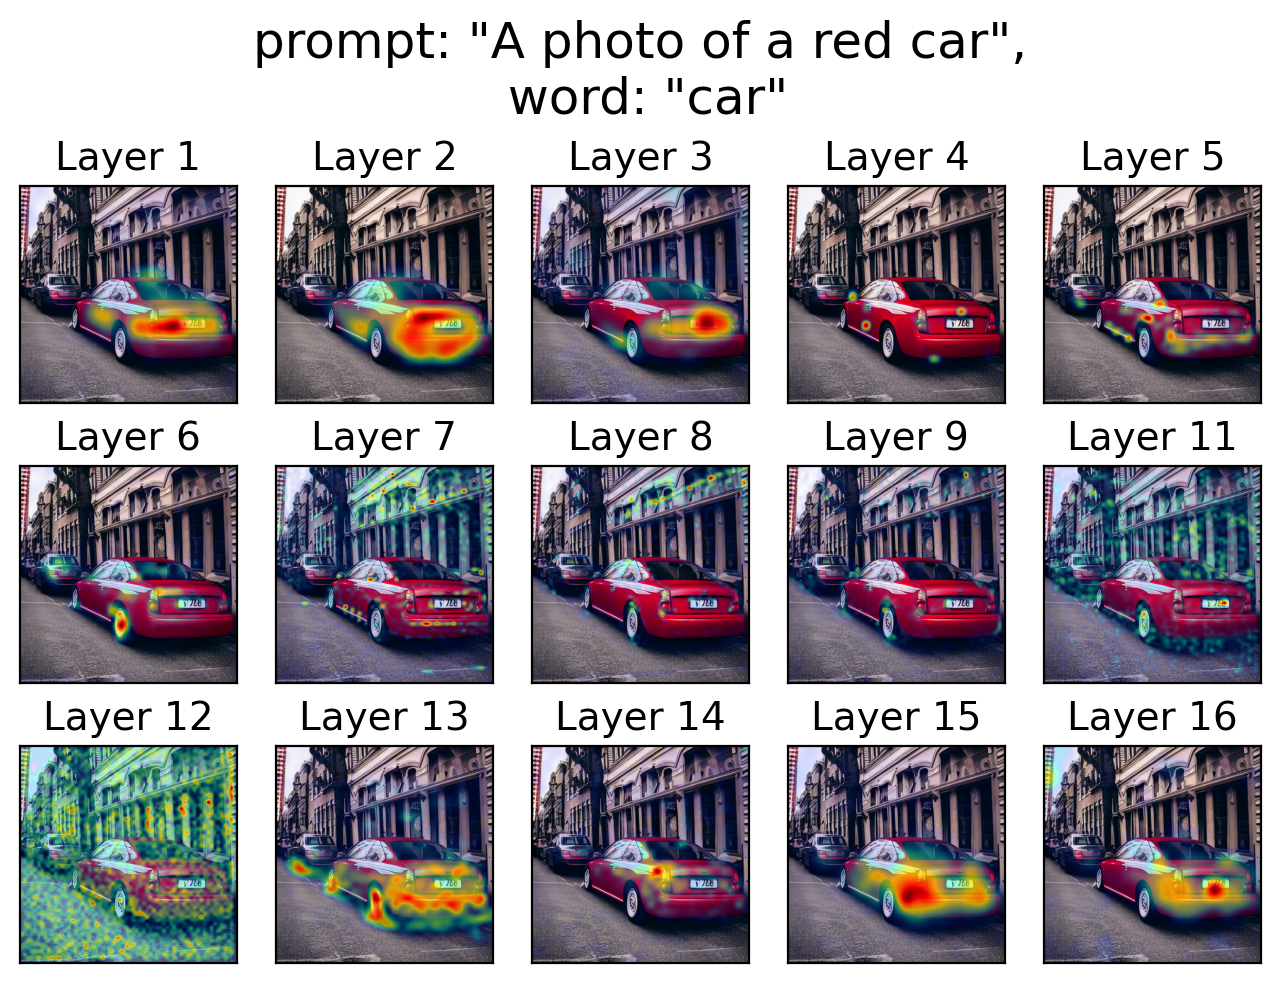

<Figure size 500x1000 with 0 Axes>

In [13]:
heatmaps_1 = []
prompt_1 = "A photo of a red car"
word_1 = "car"
seed = 228
generate_and_plot(seed, prompt_1, word_1, heatmaps_1)

  0%|          | 0/50 [00:00<?, ?it/s]

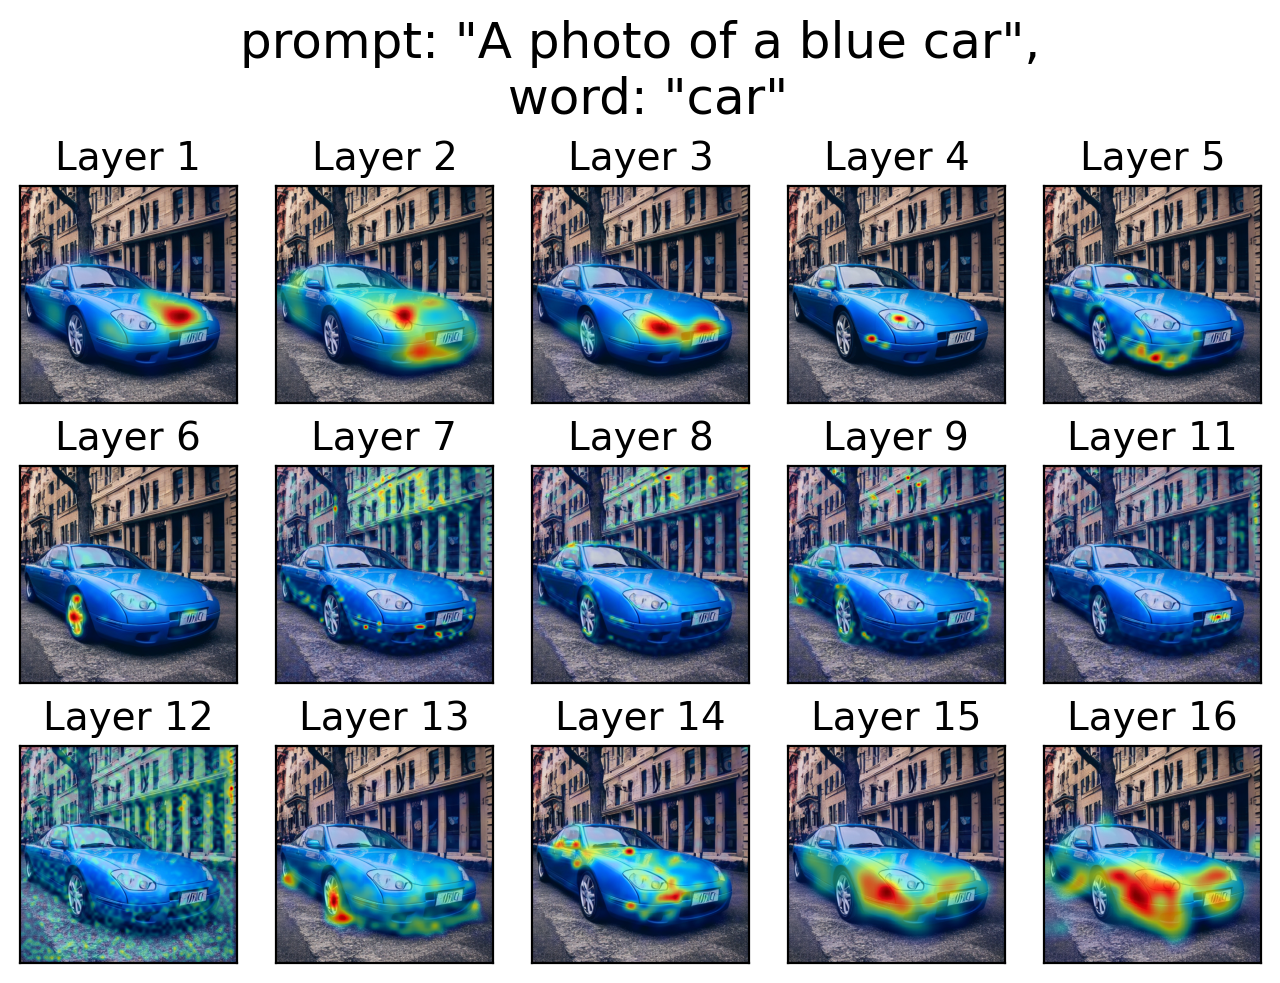

<Figure size 500x1000 with 0 Axes>

In [14]:
heatmaps_2 = []
prompt_2 = "A photo of a blue car"
word_2 = "car"
seed = 228
generate_and_plot(seed, prompt_2, word_2, heatmaps_2)

In [15]:
heatmaps_sim = []

for heatmap_1, heatmap_2 in zip(heatmaps_1, heatmaps_2):
    cosine_similarity = compute_cosine_similarity(heatmap_1.heatmap, heatmap_2.heatmap)
    heatmaps_sim.append(cosine_similarity)

for idx, value in enumerate(heatmaps_sim):
    print(f"layer_idx={layers_without_mid[idx]}, sim={value:.2f}")

layer_idx=1, sim=0.84
layer_idx=2, sim=0.87
layer_idx=3, sim=0.83
layer_idx=4, sim=0.18
layer_idx=5, sim=0.57
layer_idx=6, sim=0.76
layer_idx=7, sim=0.95
layer_idx=8, sim=0.86
layer_idx=9, sim=0.93
layer_idx=11, sim=0.96
layer_idx=12, sim=0.99
layer_idx=13, sim=0.83
layer_idx=14, sim=0.88
layer_idx=15, sim=0.88
layer_idx=16, sim=0.80
